# Decision Tree

# Importing libraries

In [13]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.tree import plot_tree
import sklearn

import matplotlib.pyplot as plt

# Import Data

In [8]:
df = pd.read_csv("Z:\Machine-Learning-Lab\exp 3 decision trees\data.csv")
df.info()

df_c = pd.read_csv("Z:\Machine-Learning-Lab\exp 3 decision trees\Advertising.csv")
df_c.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Outlook      14 non-null     object
 1   Temperature  14 non-null     object
 2   Humidity     14 non-null     object
 3   Wind         14 non-null     object
 4   Play Tennis  14 non-null     object
dtypes: object(5)
memory usage: 692.0+ bytes
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   radio      200 non-null    float64
 2   newspaper  200 non-null    float64
 3   sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


<>:1: SyntaxWarning: invalid escape sequence '\M'
<>:4: SyntaxWarning: invalid escape sequence '\M'
<>:1: SyntaxWarning: invalid escape sequence '\M'
<>:4: SyntaxWarning: invalid escape sequence '\M'
C:\Users\guhan\AppData\Local\Temp\ipykernel_15012\4271428224.py:1: SyntaxWarning: invalid escape sequence '\M'
  df = pd.read_csv("Z:\Machine-Learning-Lab\exp 3 decision trees\data.csv")
C:\Users\guhan\AppData\Local\Temp\ipykernel_15012\4271428224.py:4: SyntaxWarning: invalid escape sequence '\M'
  df_c = pd.read_csv("Z:\Machine-Learning-Lab\exp 3 decision trees\Advertising.csv")


In [3]:
# Converting categorical variables into dummies/indicator variables

df_getdummy=pd.get_dummies(data=df, columns=['Temperature', 'Humidity', 'Outlook', 'Wind'])
df_getdummy

,Play Tennis,Temperature_Cool,Temperature_Hot,Temperature_Mild,Humidity_High,Humidity_Normal,Outlook_Overcast,Outlook_Rain,Outlook_Sunny,Wind_Strong,Wind_Weak
0,No,False,True,False,True,False,False,False,True,False,True
1,No,False,True,False,True,False,False,False,True,True,False
2,Yes,False,True,False,True,False,True,False,False,False,True
3,Yes,False,False,True,True,False,False,True,False,False,True
4,Yes,True,False,False,False,True,False,True,False,False,True
5,No,True,False,False,False,True,False,True,False,True,False
6,Yes,True,False,False,False,True,True,False,False,True,False
7,No,False,False,True,True,False,False,False,True,False,True
8,Yes,True,False,False,False,True,False,False,True,False,True
9,Yes,False,False,True,False,True,False,True,False,False,True


# Split into train and test dataset

In [10]:
X = df_getdummy.drop('Play Tennis',axis=1)
y = df_getdummy['Play Tennis']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)

x_cont = df_c.drop('sales',axis=1)
y_cont = df_c['sales']

x_cont_train, x_cont_test, y_cont_train, y_cont_test = train_test_split(x_cont, y_cont, test_size=0.30, random_state=101)


# Construct the decision trees

In [15]:

# ID3
dtree1 = DecisionTreeClassifier(criterion='entropy',max_depth=2)
dtree1.fit(X_train,y_train)
id3_predictions = dtree1.predict(X_test)

# ID3 With Continous Data
dtree1_cont = DecisionTreeRegressor(criterion='absolute_error',max_depth=2)
dtree1_cont.fit(x_cont_train,y_cont_train)
id3_predictions_cont = dtree1_cont.predict(x_cont_test)

# CART
dtree2 = DecisionTreeClassifier(criterion='gini',max_depth=2)
dtree2.fit(X_train,y_train)
cart_predictions = dtree2.predict(X_test)

# C4.5
dtree3 = DecisionTreeClassifier(criterion='log_loss',max_depth=2)
dtree3.fit(X_train,y_train)
c45_predictions = dtree3.predict(X_test)

# CHI-squared tree
chi_tree = DecisionTreeClassifier(criterion='entropy', splitter='best')
chi_tree.fit(X_train, y_train)
chi_predicions = chi_tree.predict(X_test)

# Display the Trees

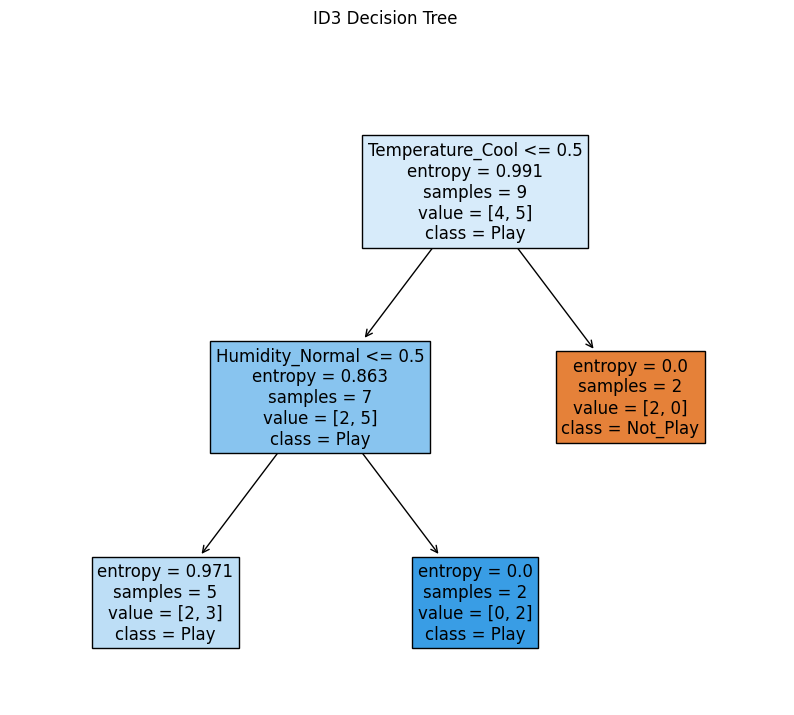

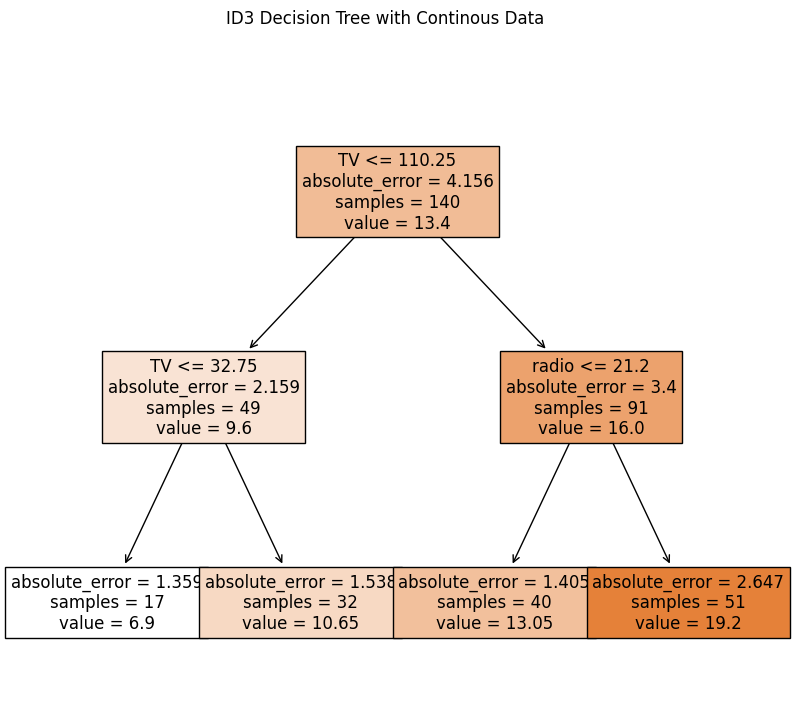

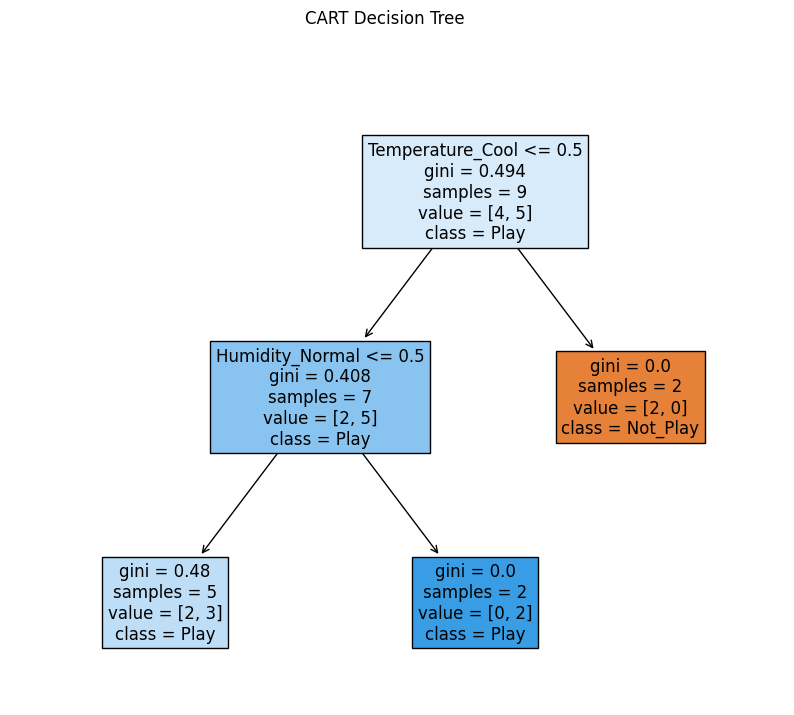

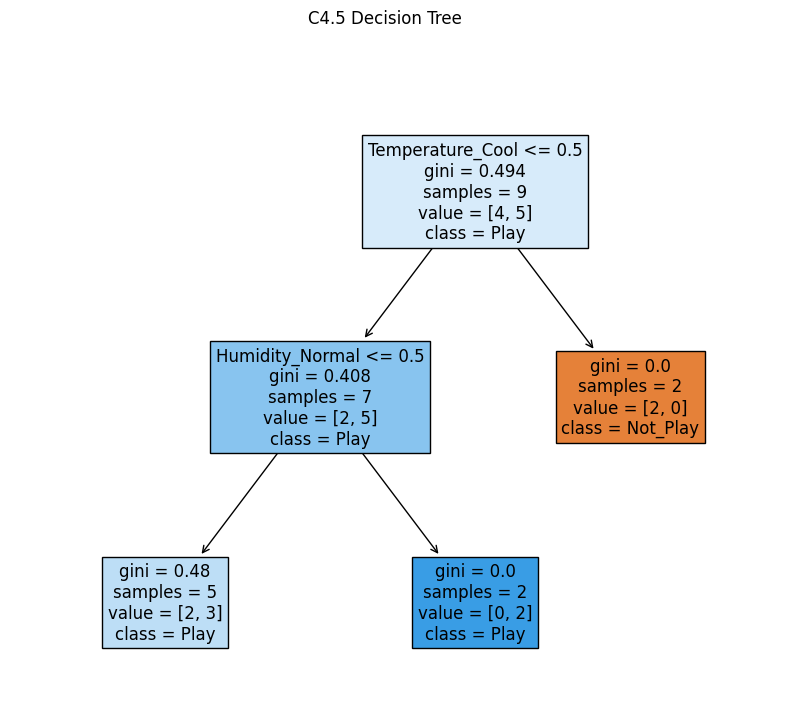

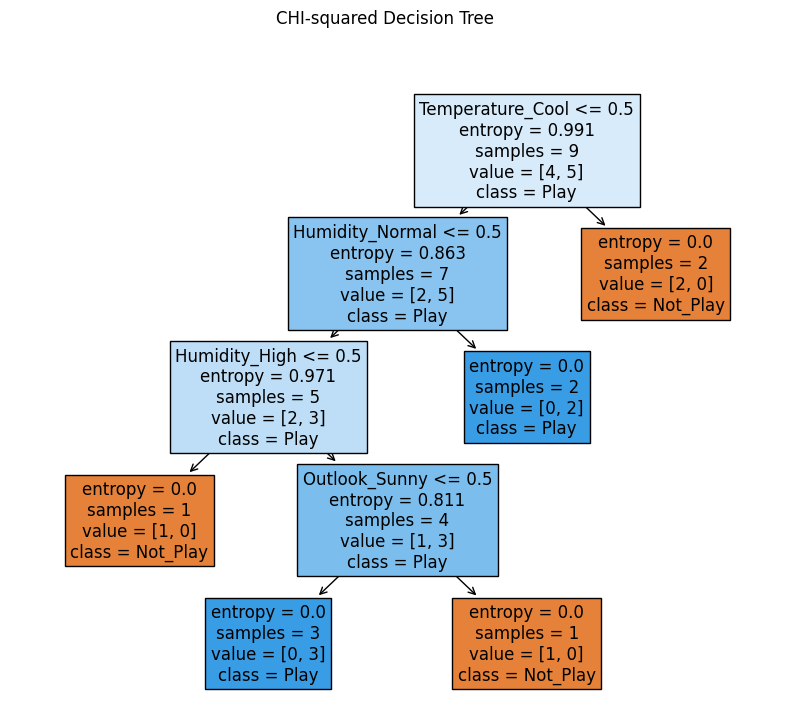

In [16]:
fig1 = plt.figure(figsize=(10,8))
plt.suptitle("ID3 Decision Tree")
a = plot_tree(dtree1, feature_names=df_getdummy.columns, fontsize=12, filled=True, 
              class_names=['Not_Play', 'Play'])

# display the continous data tree
fig2 = plt.figure(figsize=(10,8))
plt.suptitle("ID3 Decision Tree with Continous Data")
a = plot_tree(dtree1_cont, feature_names=x_cont.columns, fontsize=12, filled=True)


fig2 = plt.figure(figsize=(10,8), )
plt.suptitle("CART Decision Tree")
b = plot_tree(dtree2, feature_names=df_getdummy.columns, fontsize=12, filled=True, 
              class_names=['Not_Play', 'Play'])

fig3 = plt.figure(figsize=(10,8), )
plt.suptitle("C4.5 Decision Tree")
b = plot_tree(dtree2, feature_names=df_getdummy.columns, fontsize=12, filled=True, 
              class_names=['Not_Play', 'Play'])

fig4 = plt.figure(figsize=(10,8), )
plt.suptitle("CHI-squared Decision Tree")
b = plot_tree(chi_tree, feature_names=df_getdummy.columns, fontsize=12, filled=True, 
              class_names=['Not_Play', 'Play'])

